<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
alpha = 0.05
sample_sizes = [10, 50, 100, 150, 200, 500, 600, 800, 1000]
num_samples = 10 ** 3
distributions = {
    "normal": lambda n: np.random.normal(0, 1, n),
    "uniform": lambda n: np.random.uniform(-np.sqrt(3), np.sqrt(3), n),
    "exponential": lambda n: np.random.exponential(1, n) - 1
}

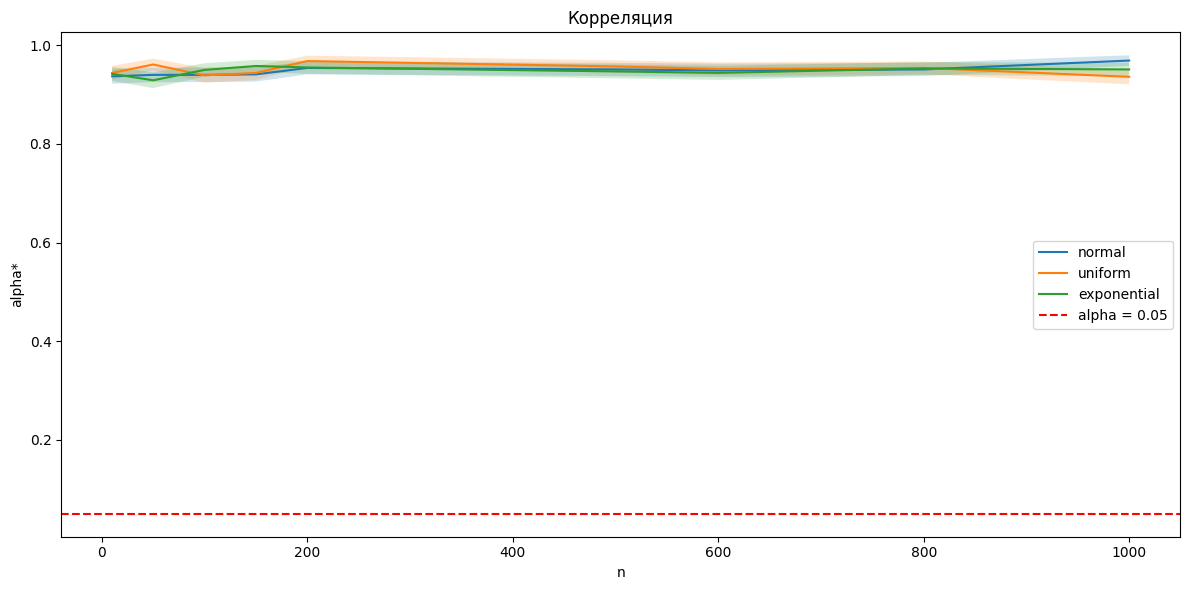

In [12]:
correlation_results = {}
grubbs_results = {}

for n in sample_sizes:
    correlation_results[n] = {"normal": 0, "uniform": 0, "exponential": 0}
    grubbs_results[n] = {"normal": 0, "uniform": 0, "exponential": 0}
    for dist_name, dist_func in distributions.items():
        for _ in range(num_samples):
            sample1 = dist_func(n)
            sample2 = dist_func(n)

            correlation_coefficient, p_value = stats.pearsonr(sample1, sample2)
            if p_value > alpha:
                correlation_results[n][dist_name] += 1

            sorted_sample1 = np.sort(sample1)
            g1 = np.abs(sorted_sample1[0] - np.mean(sorted_sample1)) / np.std(sorted_sample1)
            g2 = np.abs(sorted_sample1[-1] - np.mean(sorted_sample1)) / np.std(sorted_sample1)
            critical_value = stats.t.ppf(1 - alpha / (2 * n), n - 2) # критическое значение для граббса

            if g1 < critical_value and g2 < critical_value:
              grubbs_results[n][dist_name] += 1

plt.figure(figsize=(12, 6))
def plot_with_ci(ax, results, title):
    for dist_name in distributions:
        alpha_star = [results[n][dist_name] / num_samples for n in sample_sizes]
        ci = 1.96 * np.sqrt(np.array(alpha_star)*(1 - np.array(alpha_star))/ num_samples)
        ax.plot(sample_sizes, alpha_star, label=dist_name)
        ax.fill_between(sample_sizes, np.array(alpha_star) - ci, np.array(alpha_star) + ci, alpha = 0.2)

    ax.axhline(y=alpha, color='r', linestyle='--', label='alpha = 0.05')
    ax.set_xlabel("n")
    ax.set_ylabel("alpha*")
    ax.set_title(title)
    ax.legend()


plot_with_ci(plt.gca(), correlation_results, "Корреляция")


plt.tight_layout()
plt.show()

### Нет зависимости от распределения, почти всегда отвергаем верную H0

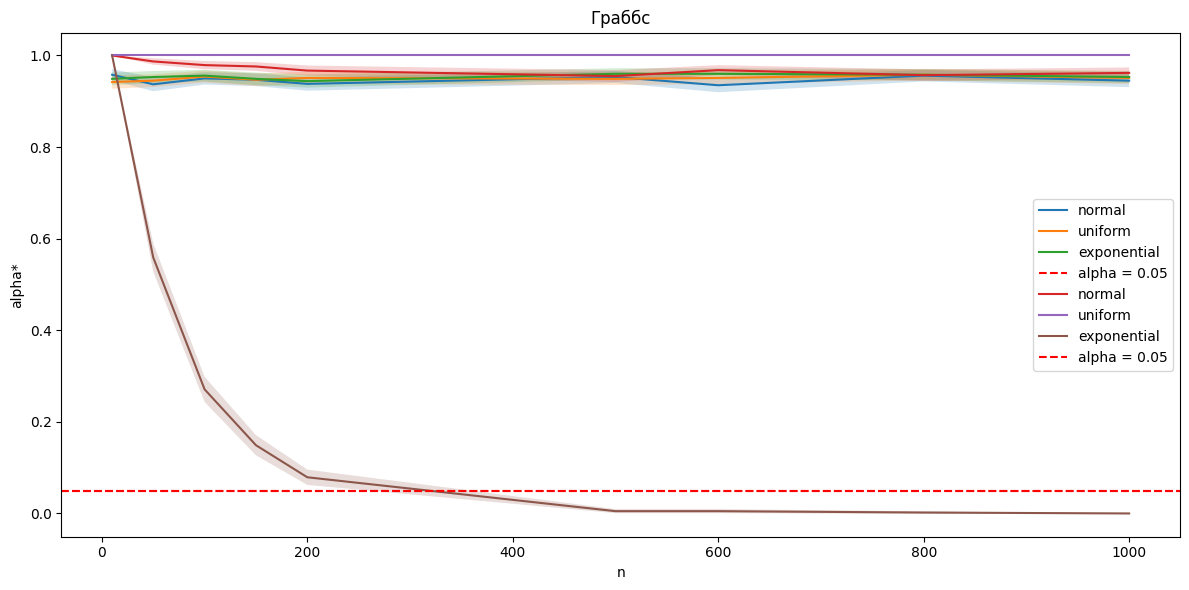

In [5]:
correlation_results = {}
grubbs_results = {}

for n in sample_sizes:
    correlation_results[n] = {"normal": 0, "uniform": 0, "exponential": 0}
    grubbs_results[n] = {"normal": 0, "uniform": 0, "exponential": 0}
    for dist_name, dist_func in distributions.items():
        for _ in range(num_samples):
            sample1 = dist_func(n)
            sample2 = dist_func(n)

            correlation_coefficient, p_value = stats.pearsonr(sample1, sample2)
            if p_value > alpha:
                correlation_results[n][dist_name] += 1

            sorted_sample1 = np.sort(sample1)
            g1 = np.abs(sorted_sample1[0] - np.mean(sorted_sample1)) / np.std(sorted_sample1)
            g2 = np.abs(sorted_sample1[-1] - np.mean(sorted_sample1)) / np.std(sorted_sample1)
            critical_value = stats.t.ppf(1 - alpha / (2 * n), n - 2) # критическое значение для граббса

            if g1 < critical_value and g2 < critical_value:
              grubbs_results[n][dist_name] += 1

plt.figure(figsize=(12, 6))
def plot_with_ci(ax, results, title):
    for dist_name in distributions:
        alpha_star = [results[n][dist_name] / num_samples for n in sample_sizes]
        ci = 1.96 * np.sqrt(np.array(alpha_star)*(1 - np.array(alpha_star))/ num_samples)
        ax.plot(sample_sizes, alpha_star, label=dist_name)
        ax.fill_between(sample_sizes, np.array(alpha_star) - ci, np.array(alpha_star) + ci, alpha = 0.2)

    ax.axhline(y=alpha, color='r', linestyle='--', label='alpha = 0.05')
    ax.set_xlabel("n")
    ax.set_ylabel("alpha*")
    ax.set_title(title)
    ax.legend()


plot_with_ci(plt.gca(), grubbs_results, "Граббс")

plt.tight_layout()
plt.show()

### Граббс не очень корректен для экспоненты